## Numerical computation of Eigenenergies and Eigenstates analyzing the time evolution of the Schrödinger Wave Function
### 1.  Launch packages 

In [1]:
%pylab inline
import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
from   scipy import linalg       
from   scipy.signal import blackman 

Populating the interactive namespace from numpy and matplotlib


In [2]:

# Set labels' font size

plt.rcParams.update({'axes.labelsize': 26 })
plt.rcParams.update({'legend.fontsize': 17 })
plt.rcParams.update({'xtick.labelsize': 15 })
plt.rcParams.update({'ytick.labelsize': 15 })


### 2. Specify System's Quantum Parameters in atomic units

In [3]:

X_gridDIM    =  512        # Discretization grid size in X 
X_amplitude  =  10         # Window range -X1_amplitude to X1_amplitude
dt           =  0.008      # Time increment
timeSteps    =  10000      # Number of iterations
hbar         =  1          # Plank constant

timeRange     =  np.array(range(0,timeSteps+1))*dt        
print ' Simulation time = ', np.max(timeRange) ,'(a.u.)'


 Simulation time =  80.0 (a.u.)


### 3. Build discretization resolution & coordinates

In [4]:

#-----Discretization resolution-----

dX =  2.*X_amplitude/float(X_gridDIM)
dK =  2.*np.pi/(2.*X_amplitude)
K_amplitude = dK*X_gridDIM/2.


#-----Vectors with range of coordinates-----

X_range      =  np.linspace(-X_amplitude      , X_amplitude  -dX , X_gridDIM )
K_range      =  np.linspace(-K_amplitude      , K_amplitude  -dK , X_gridDIM)
X            =  fftpack.fftshift( X_range )
K            =  fftpack.fftshift( K_range )

print "Resolution features : "
print ""
print " dX = ",dX  ,"                dK = ",dK
print ""
print " X_amplitude = +-", X_amplitude ,"            K_amplitude = +-", K_amplitude



Resolution features : 

 dX =  0.0390625                 dK =  0.314159265359

 X_amplitude = +- 10             K_amplitude = +- 80.4247719319


### 4. Set the Potential and the Kinetic terms

In [5]:
# Parameters in Atomic units (a.u.)
mass = 1
omega = 1


def Potential(x):
    """
    Potential  function   
    """
    return 0.1*x**4

            
def dPotentialdx(x):
    """
    dPotential/dx  function   
    """
    return 4*0.1*x**3


def Kinetic(k):
    """
    Kinetic Energy function   
    """
    return k**2/(2*mass)


### 4.1 Plot the potential

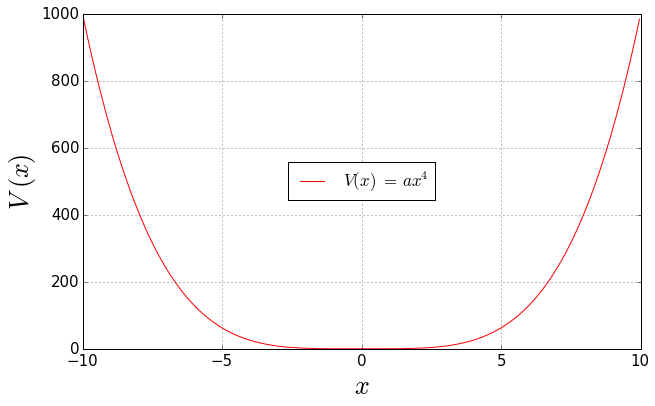

In [6]:

plt.figure(figsize=(10,6))
plt.plot( X_range, Potential(X_range) ,"r",label = '$V(x) \\ =\\ ax^4 $' )
xlabel('$x$')
ylabel('$V \\ (x)$')
legend(loc = "center")
grid('on')


### 5. Plot functions

In [7]:
def Plot_Psi(Psi_x):
    
    """
    Plot the wavefunction in the position and
    momentum spaces.
    """
    # Probability in the position space
    
    rho_x = np.abs(  Psi_x )**2
    
    # Probability in the momentum space
    
    Psi_k  = fftpack.fft(Psi_x)
    
    Psi_k /= linalg.norm(Psi_k)*np.sqrt(dK)
    
    rho_k = np.abs( Psi_k )**2
    
    # Plots
    
    plt.figure(figsize=(20,7))
    
    ax1 = plt.subplot(121)
    
    plt.plot( fftpack.fftshift( X ), fftpack.fftshift( rho_x ) , label ='$|\psi(x , t)|^2 $')  
    
    plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift( Psi_x ) )   , label ='$Re[\psi(x , t)] $')
    
    plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift( Psi_x ) )   ,label = '$Im[\psi(x , t)]$')
    
    plt.xlabel(" $x$")
    
    plt.grid('on')
    
    plt.legend(loc='upper left')


    ax2 = plt.subplot(122)
    
    plt.plot( fftpack.fftshift( K ), fftpack.fftshift(rho_k)  , label ='$|\psi(k , t)|^2 $') 
    
    plt.plot( fftpack.fftshift( K ) , np.real( fftpack.fftshift(Psi_k) )   , label ='$Re[\psi(k , t)] $')
    
    plt.plot( fftpack.fftshift( K ), np.imag( fftpack.fftshift(Psi_k) )   ,label = '$Im[\psi(k , t)]$')
       
    plt.xlabel(" $k$")
    
    plt.grid('on')
    
    plt.legend(loc='upper left')
    
    return

## 6. Propagation
### 6.1 Set the Initial state

In [8]:

def Psi_HarmonicOscillator( hBar, n, mass, omega, X0, P0, X ):

		k = np.sqrt(mass*omega ) 
        
		return np.exp(1j*P0*(X-X0))*np.exp( -0.5*k**2*(X-X0)**2 )*hermite(n)( k*(X-X0) )
    

In [9]:

def Psi_Gaussian( x_init, k_init, s ):
    
    return np.exp(  -0.5  *( ( X-x_init )/s )**2 + 1j*k_init*X  )


In [10]:

# Center of the wave packet

x_init = -2.5 #  Center of the wave packet

k_init = 0    #  Center of the wave packet in "k" space

s = 1         #  Standart deviation 

n = 0         #  Quantum number

# Initial wave packet in x space 

Psi_init_x = Psi_Gaussian( x_init, k_init, s )

Psi_init_x /= linalg.norm(Psi_init_x)*np.sqrt(dX) 

rho_init_x = np.abs(  Psi_init_x  )**2

# Initial wave packet in k space 

Psi_init_k  = fftpack.fft(Psi_init_x)

Psi_init_k /= linalg.norm(Psi_init_k)*np.sqrt(dK) 

rho_init_k = np.abs( Psi_init_k )**2

# Print features 

print "Initial state features:"
print ""
print "Energy Average:",np.dot( rho_init_x,Potential(X)  )*dX + np.dot(  rho_init_k ,Kinetic(K)  )*dK      
print "Psi_init_x renormalization norm :",linalg.norm(Psi_init_x)*np.sqrt(dX)
print "Psi_init_k renormalization norm :",linalg.norm(Psi_init_k)*np.sqrt(dK)


Initial state features:

Energy Average: 6.10625
Psi_init_x renormalization norm : 1.0
Psi_init_k renormalization norm : 1.0


### 6.2 Initial State plot

(-10, 10)

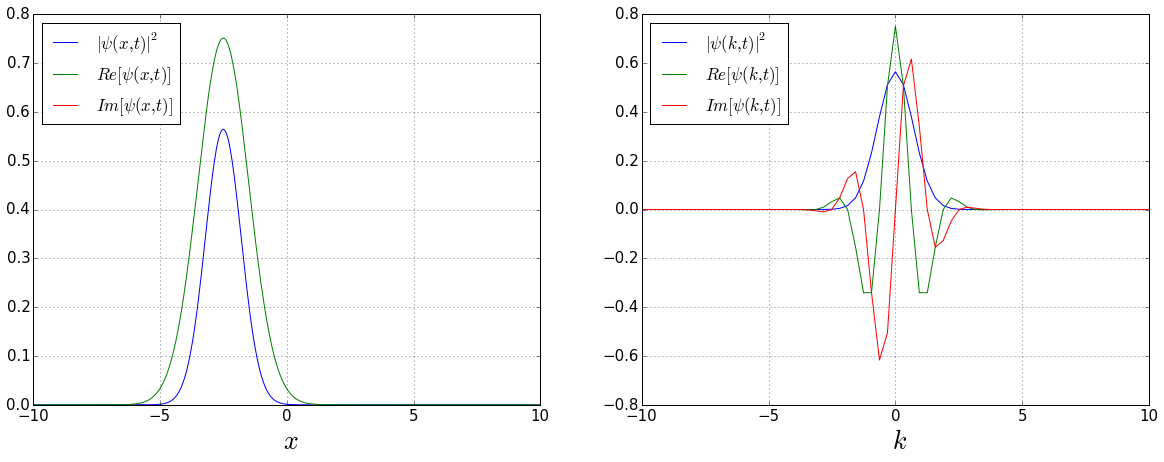

In [11]:

Plot_Psi( Psi_init_x )
plt.xlim(-10,10)


### 6.3 Split Operator Method: 1st Order Scheme

In [12]:
# -----------Propagators factors---------------

#  kinetic propagator 

kineticPropagatorFactor= np.exp(  -1j*dt*Kinetic(K)*hbar  )

#  Potential propagator 

potentialPropagatorFactor=np.exp(  -1j*dt*Potential(X)/hbar  )

In [13]:

# Lists to save expectation values

Psi_x = Psi_init_x.copy()  

data_PsiS= [ Psi_x ]

data_Expectation_X=[ np.dot( rho_init_x , X)*dX ]

data_Expectation_X2=[ np.dot( rho_init_x , X**2)*dX ]

data_Expectation_P=[ np.dot( rho_init_k , K)*dK ]

data_Expectation_P2=[ np.dot( rho_init_k , K**2)*dK ]

data_Expectation_XP=[  -1j*hbar*np.sum( np.conj(Psi_x)*X*np.gradient(Psi_x,dX) )*dX  ]

data_Expectation_PX=[  -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(X*Psi_x,dX) )*dX   ]

data_Expectation_F=[ -1*np.dot( rho_init_x , dPotentialdx(X) )*dX ]

data_Expectation_XdVdX=[ np.dot( rho_init_x , X*dPotentialdx(X) )*dX ]

data_Expectation_PdVdX=[ -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(dPotentialdx(X)*Psi_x,dX) )*dX  ]

data_Expectation_dVdX_P=[ -1j*hbar*np.sum( np.conj(Psi_x)*dPotentialdx(X)*np.gradient(Psi_x,dX) )*dX  ]

data_Expectation_V=[ np.dot( rho_init_x , Potential(X) )*dX ]


#----Propagation------------------------------------------------

for tIndex in range(1,timeSteps+1):
    
    #  x--> k
    
    Psi_k  = fftpack.fft(Psi_x)
    
    Psi_k *= kineticPropagatorFactor
        
    # k--> x
    
    Psi_x = fftpack.ifft(Psi_k) 
    
    Psi_x *= potentialPropagatorFactor 
       
    # Coordinate probability  
    
    rho_x = np.abs(  Psi_x  )**2    
    
    # Momemtum probability 
    
    Psi_k = fftpack.fft(Psi_x)
    
    Psi_k /= linalg.norm(Psi_k)*np.sqrt(dK)
    
    rho_k = np.abs( Psi_k )**2
     
        
    #--- Compute expectations values
        
    Expectation_X = np.dot( rho_x , X)*dX
    
    Expectation_X2= np.dot( rho_x , X**2)*dX
    
    Expectation_P = np.dot( rho_k , K)*dK
    
    Expectation_P2= np.dot( rho_k , K**2)*dK
    
    Expectation_XP= -1j*hbar*np.sum( np.conj(Psi_x)*X*np.gradient(Psi_x,dX) )*dX 
    
    Expectation_PX= -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(X*Psi_x,dX) )*dX 
    
    Expectation_F= -1*np.dot( rho_x , dPotentialdx(X) )*dX
    
    Expectation_XdVdX= np.dot( rho_x , X*dPotentialdx(X) )*dX
    
    Expectation_PdVdX=  -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(dPotentialdx(X)*Psi_x,dX) )*dX
    
    Expectation_dVdX_P= -1j*hbar*np.sum( np.conj(Psi_x)*dPotentialdx(X)*np.gradient(Psi_x,dX) )*dX  
    
    Expectation_V= np.dot( rho_x , Potential(X) )*dX
  
        
    #--- Make data lists
      
    data_PsiS.append(Psi_x)
    
    data_Expectation_X.append(Expectation_X)  
    
    data_Expectation_X2.append(Expectation_X2) 
    
    data_Expectation_P.append(Expectation_P)   
    
    data_Expectation_P2.append(Expectation_P2) 
    
    data_Expectation_XP.append(Expectation_XP) 
    
    data_Expectation_PX.append(Expectation_PX)
    
    data_Expectation_F.append(Expectation_F)   
    
    data_Expectation_XdVdX.append(Expectation_XdVdX) 
    
    data_Expectation_PdVdX.append(Expectation_PdVdX)
    
    data_Expectation_dVdX_P.append(Expectation_dVdX_P)
    
    data_Expectation_V.append(Expectation_V) 


In [14]:
#----- Final state ---------

Psi_end_x = Psi_x

#------Store the Waves functions "PsiS" as an array

PsiS= fftpack.fftshift( np.array(data_PsiS), axes=1 )

### 7. Eigenstates  $|\psi_{n}(x)|$ computation 
### 7.1 Without filtering the states

In [15]:
#  Step 1: Computhe the Energy range

Energy_range = fftpack.fftshift(   fftpack.fftfreq(  PsiS.shape[0], dt/(2*np.pi) )    )

dE = Energy_range[1] - Energy_range[0]

print "Energy resolution:",dE,"(a.u.)"


Energy resolution: 0.0785319631434 (a.u.)


In [16]:

#  Step 2: Compute the IFFT along the time axis

PsiS_Vs_energy =  fftpack.ifftshift(
                  fftpack.ifft( PsiS,axis=0  )
                                    ,axes=0  )


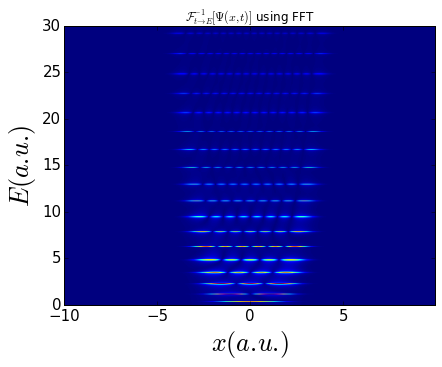

In [17]:

#  Step 3: Plots

plt.figure(figsize=(9,5))

plt.title('$\\mathcal{F}_{t \\to E}^{-1}[ \\Psi(x, t) ]$ using FFT')

abs_PsiS_Vs_energy = np.abs(PsiS_Vs_energy)

extent=[ -X_amplitude , X_amplitude - dX , Energy_range.min() , Energy_range.max() ]

plt.imshow( abs_PsiS_Vs_energy, extent=extent, origin='lower', aspect=0.5)

plt.ylim( 0, 30.)

plt.ylabel('$E  (a.u.)$')

plt.xlabel('$x (a.u.)$')


Quartic oscillator's absolute eigenstates $|\psi_{n}(x)|$. The ground state is at the botton, then the 1st excited, and so on.

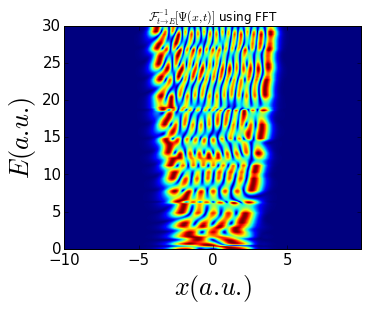

In [18]:

#  Step 4: Post process for better visualization

plt.title('$\\mathcal{F}_{t \\to E}^{-1}[ \\Psi(x, t) ]$ using FFT')

abs_PsiS_Vs_energy /= abs_PsiS_Vs_energy.max(axis=1)[:,np.newaxis]

extent=[ -X_amplitude , X_amplitude - dX , Energy_range.min() , Energy_range.max() ]

plt.imshow( abs_PsiS_Vs_energy, extent=extent, origin='lower', aspect=0.5)

plt.ylim( 0, 30.)

plt.ylabel('$E  (a.u.)$')

plt.xlabel('$x (a.u.)$')


### 7.2 Filtering the States with the Blackman Window

In [19]:

# Step 1:  Apply the blackman Window to the states and then compute the IFFT along the time axis

PsiS_Vs_energy_blackman =  fftpack.ifftshift(
                           fftpack.ifft(   PsiS * blackman(PsiS.shape[0])[:,np.newaxis]  , axis=0   )
                           ,axes=0 )


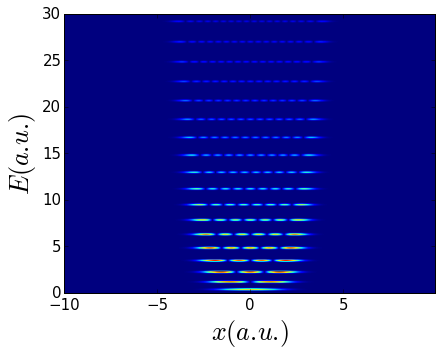

In [20]:

# Step 2: Plot results

plt.figure(figsize=(9,5))

abs_PsiS_Vs_energy_blackman = np.abs(PsiS_Vs_energy_blackman)

extent=[ -X_amplitude , X_amplitude - dX , Energy_range.min() , Energy_range.max() ]

plt.imshow( abs_PsiS_Vs_energy_blackman, extent=extent, origin='lower', aspect=0.5)

plt.ylim( 0, 30.)

plt.ylabel('$E  (a.u.)$')

plt.xlabel('$x (a.u.)$')


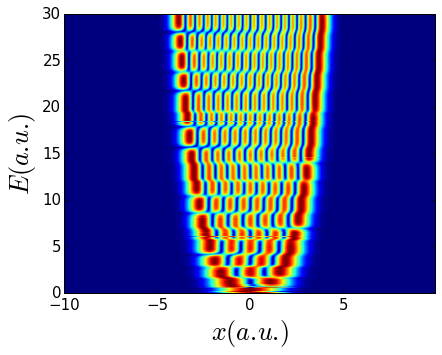

In [21]:

# Step 3  Post process for better visualization

plt.figure(figsize=(9,5))

abs_PsiS_Vs_energy_blackman /= abs_PsiS_Vs_energy_blackman.max(axis=1)[:,np.newaxis]

extent=[ -X_amplitude , X_amplitude - dX , Energy_range.min() , Energy_range.max() ]

plt.imshow( abs_PsiS_Vs_energy_blackman, extent=extent, origin='lower', aspect=0.5)

plt.ylim( 0, 30.)

plt.ylabel('$E  (a.u.)$')

plt.xlabel('$x (a.u.)$')


### 8. Routine: Mutually Unbiased Bases (MUB) method 
This routine computes the eigenenergies and eigenstates in the Schrodinger pictue through the MUB method.

In [22]:

# Build a diagonalized Hamiltonian in the position representation
    
Hamiltonian = fft.fft(  np.diag( Kinetic(K) ), axis=1 )

Hamiltonian = fft.ifft( Hamiltonian, axis=0 )

Hamiltonian += np.diag( Potential( X ) )
    
# Get the eigenenergies and eigenfunctions
    
exact_eigenenergies, exact_eigenstates = linalg.eigh(Hamiltonian)
    
# Extract real part of the eigenenergies
    
exact_eigenenergies = np.real(exact_eigenenergies)
    
# Take the transpose and the real part of the eigenstates
    
exact_eigenstates = np.ascontiguousarray(exact_eigenstates.T.real)


### 8.1 Plot some Exact Eigenstates

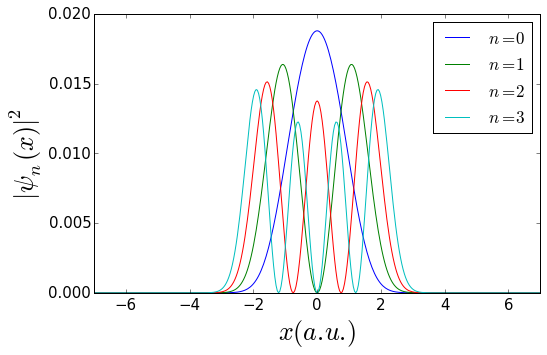

In [23]:

# Plot some eigenstates

plt.figure(figsize=(8,5))

plt.plot( fftpack.fftshift(X) ,  np.abs( fftpack.fftshift(exact_eigenstates[0]) )**2,label ='$ n=0 $') 

plt.plot( fftpack.fftshift(X) ,  np.abs( fftpack.fftshift(exact_eigenstates[1]) )**2  ,label ='$ n=1 $') 

plt.plot( fftpack.fftshift(X) ,  np.abs(fftpack.fftshift(exact_eigenstates[2]) )**2  ,label ='$ n=2 $') 

plt.plot( fftpack.fftshift(X) ,  np.abs( fftpack.fftshift(exact_eigenstates[3]) )**2  ,label ='$ n=3 $') 

xlabel("$x(a.u.)$")

ylabel("$|\psi_n(x )|^2 $")

xlim([-7,7])

plt.legend(loc='upper right')


### 9. Comparison between the Autocorrelation function using "IFFT" and "IFFT  + Blackman filter"
### 9.1 Autocorrelation Function without filtering 

In [24]:

# Step 1: compute the auto correlation function

auto_corr = np.array(  [ np.vdot(PsiS[0],PsiS_enesima)*dX for PsiS_enesima in PsiS ]  )


In [25]:

# Step 2: Apply the the "ifft" and then take the absolute value squared 

abs_auto_corr_Vs_energy = np.abs(    fftpack.ifftshift( fftpack.ifft(auto_corr) )    ) 



### 9.2 Filtering the Autocorrelation Funtion

In [26]:

# Step 1: Filtering the autocorrelation function with the Blackman Window

auto_corr_blackman = auto_corr * blackman(auto_corr.size)


In [27]:

# Step 2: Apply the the "ifft" and then take the absolute value squared 

abs_auto_corr_Vs_energy_blackman = np.abs(    fftpack.ifftshift(   fftpack.ifft(auto_corr_blackman)   )    )


### 9.3 Plot the Results

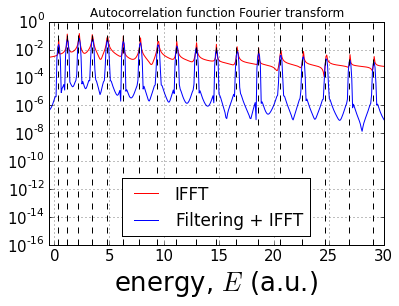

In [28]:

plt.title("Autocorrelation function Fourier transform")

plt.semilogy( Energy_range,  abs_auto_corr_Vs_energy  , 'r', label='IFFT')

plt.semilogy( Energy_range,  abs_auto_corr_Vs_energy_blackman , 'b', label='Filtering + IFFT')

plt.xlim([-0.5, 30.])

# Display exact energies along vertical lines

for E_index in exact_eigenenergies:
    
    plt.axvline(E_index, linestyle='--', color='black')

plt.legend(loc='lower center')

plt.xlabel('energy, $E$ (a.u.)')

plt.grid('on')


### 10. Comparison between the "Approximated filtering eigenstates" with "the exact eigenstates"

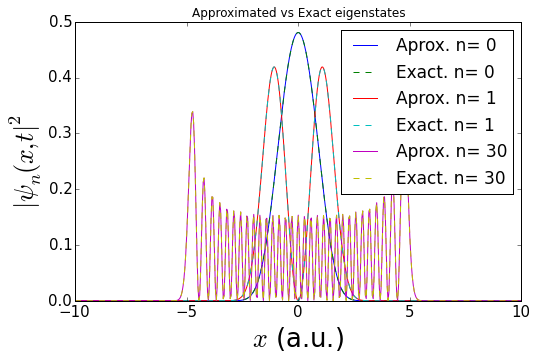

In [29]:
plt.figure(figsize=(8,5))

plt.title("Approximated vs Exact eigenstates")

# Plot some eigenstates. n_Index represents the quantum number

for n_Index in [0,1,30]:

    # Find the approximated eigenstates from PsiS_Vs_energy_blackman
    
    Aprox_eigenstate = PsiS_Vs_energy_blackman[ np.searchsorted(Energy_range, exact_eigenenergies[n_Index]) ]   
    
    rho_aprox = np.abs(Aprox_eigenstate)**2
    
    rho_aprox /= rho_aprox.sum() * dX  # Normalization
    
    plt.plot( fftpack.fftshift(X) , rho_aprox , label="Aprox. n= %d" % n_Index)

    # Exact eigenstates
    
    rho_exact = np.abs( fftpack.fftshift(exact_eigenstates[n_Index]) )**2
    
    rho_exact /= rho_exact.sum() * dX  # Normalization
    
    plt.plot( fftpack.fftshift(X) , rho_exact , "--" ,label='Exact. n= %d' % n_Index)


plt.legend()

plt.xlabel('$x$ (a.u.)')

plt.ylabel('$|\psi_{n}(x , t|^2 $')

plt.show()


### 11. Average values plots
Ehrenfest's theorems:

$$ \frac{d \langle x \rangle }{dt}=\frac{\langle p\rangle}{m}  $$

$$ \frac{d \langle p \rangle}{dt} = -\langle U'(x) \rangle $$

$$ \frac{d \langle x^2 \rangle}{dt} = \frac{1}{m}\langle x p  +  p x \rangle $$

$$ \frac{d \langle p^2 \rangle }{dt} =  - \langle pU'(x) + U'(x)p \rangle $$

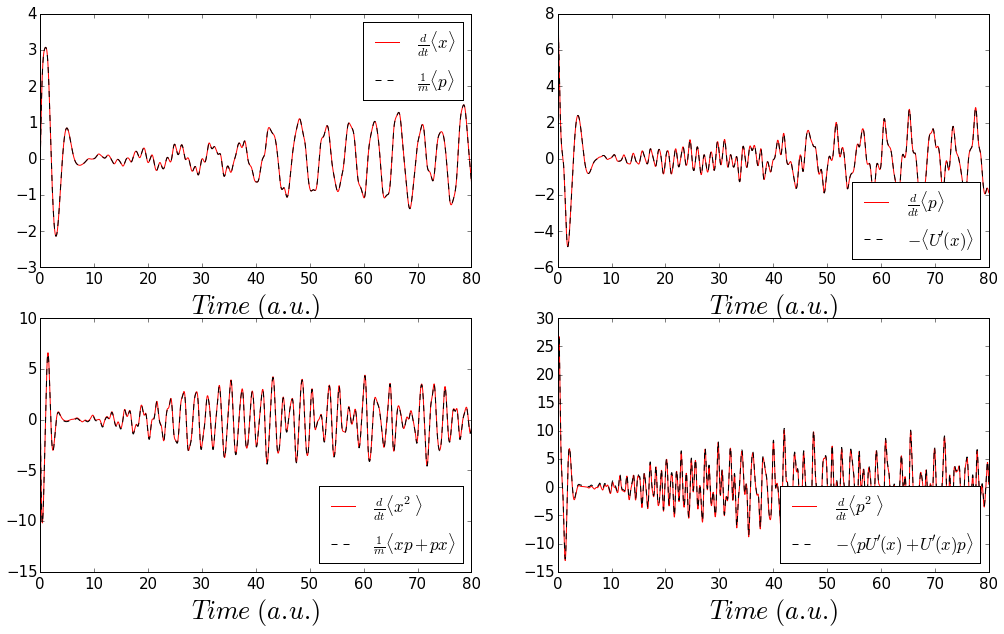

In [30]:
plt.figure(figsize=(17,10))


ax1 = subplot(221)
data_Expectation_dXdt = np.gradient(data_Expectation_X,dt) 
data_Expectation_P_mass = np.array( data_Expectation_P )/mass
plot(  timeRange, np.real( data_Expectation_dXdt ), 'r',label = '$ \\frac{d}{dt} \\langle x \\rangle $'  )
plot(  timeRange, np.real( data_Expectation_P_mass ) ,'k--', label = '$ \\frac{1}{m} \\langle p \\rangle $'  )
xlabel("$Time \\ (a.u.)$")
legend(loc = "upper right")


ax2 = subplot(222)
data_Expectation_dPdt =np.gradient(data_Expectation_P,dt)
plot(timeRange, np.real(data_Expectation_dPdt ) ,'r'   , label = '$ \\frac{d}{dt} \\langle p \\rangle $' )
plot(timeRange, np.real(data_Expectation_F) , 'k--',label = "$ -\\langle  U'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax3 = subplot(223)
data_Expectation_dX2dt = np.gradient(data_Expectation_X2,dt)
data_Expectation_XP_PX_m = ( np.array(data_Expectation_XP) +  np.array(data_Expectation_PX) )/mass
plot(timeRange, np.real(data_Expectation_dX2dt) ,'r',label = '$ \\frac{d}{dt} \\langle x^2 \\rangle $' )
plot(timeRange, np.real( data_Expectation_XP_PX_m ) ,'k--',label = '$ \\frac{1}{m} \\langle xp   + px \\rangle $' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax4 = subplot(224)
data_Expectation_dP2dt = np.gradient(data_Expectation_P2,dt)
data_Expectation_pdVdx_dVdxp = -1* ( np.array(data_Expectation_PdVdX) + np.array(data_Expectation_dVdX_P ) )
plot( timeRange,np.real(data_Expectation_dP2dt),'r',label = '$ \\frac{d}{dt} \\langle p^2 \\rangle $' )
plot(timeRange, np.real(data_Expectation_pdVdx_dVdxp),'k--',label = "$ -\\langle pU'(x) + U'(x)p \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

Virial theorem :

$$ \frac{d }{dt}\langle x p + p x  \rangle  =  \frac{ \\2 \langle p^2 \rangle }{m} - 2 \langle x V'(x) \rangle  $$

Energy:

$$  \langle H \rangle = \frac{ \langle p^2\rangle }{2m} + \langle V(x) \rangle $$

Uncertainty principle:

$$  \sigma_x \sigma_p  \geqslant   0.5 $$

Min sigmaXsigmaP : 0.5


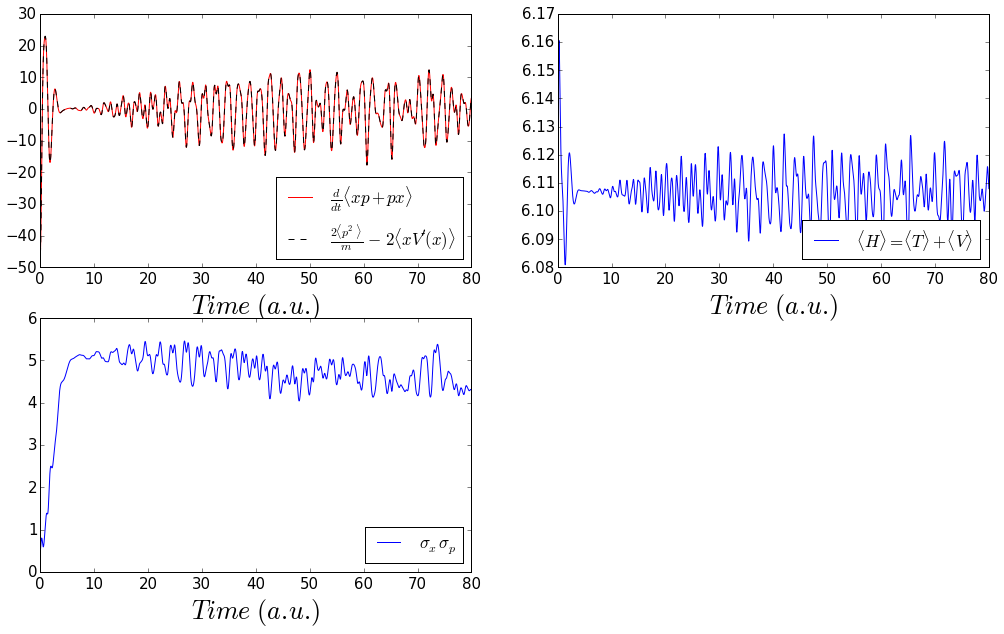

In [31]:
plt.figure(figsize=(17,10))


ax1 = subplot(221)
data_Expectation_d_PX_XP_dt = np.array(np.gradient(data_Expectation_XP,dt))+ np.array(np.gradient(data_Expectation_PX,dt))
data_Expectation_virial = 2*np.array(data_Expectation_P2)/mass -2*np.array(data_Expectation_XdVdX)
plot(timeRange, np.real(data_Expectation_d_PX_XP_dt),'r',label = '$ \\frac{d}{dt} \\langle xp + px \\rangle $' )
plot( timeRange, np.real(data_Expectation_virial),'k--',
                 label = "$ \\frac{ 2\\langle p^2 \\rangle}{m} \\ - \\ 2 \\langle x V'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")



ax2 = subplot(222)
data_Expectation_H = np.array(data_Expectation_P2)/(2*mass) + np.array(data_Expectation_V)
plot( timeRange, data_Expectation_H.real, label = '$ \\langle H \\rangle = \\langle  T \\rangle + \\langle V \\rangle$' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")



ax3 = subplot(223)
data_Expectation_sigmaX_sigmaP = np.sqrt(np.array(data_Expectation_X2).real
 -np.array(data_Expectation_X).real**2) * np.sqrt(np.array(data_Expectation_P2).real - np.array(data_Expectation_P).real**2)
plot( timeRange, data_Expectation_sigmaX_sigmaP.real, label = '$ \sigma_x \sigma_p $')
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")
print "Min sigmaXsigmaP :" ,np.min(data_Expectation_sigmaX_sigmaP.real)